# Practice 3
In this practice, I worked with four types of supervised machine learning: Naive Bayes, Decision trees, kNN, and Support Vector Machine. Extra: I conducted a principal component analysis (PCA) using an improved classification model and compared the metrics of the confusion matrix and accuracy. The dataset used was Breast Cancer Wisconsin (Diagnostic), with features computed from digitized images of FNA samples from breast masses.  These features describe the characteristics of the cell nuclei present in the image. A subset of the images can be found at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.

## Import libraries

In [80]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#Cross validation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Confusion matrix
from sklearn.metrics import (confusion_matrix, accuracy_score)
# to import the cancer patients dataset
from sklearn.datasets import load_breast_cancer
#Suport vector machine
from sklearn import svm
#Decicion trees
from sklearn import tree
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#PCA
# to standardize the features
from sklearn.preprocessing import StandardScaler 
# to apply PCA
from sklearn.decomposition import PCA 

## Data processing 
An important part of the data processing was to consider the normalization of categorical data, in this case the target variables was the diagnosis, which can be a cancer begin or malignan, I consider working with ceros and those where 0-->(M) malignan cancer and 1-->(B) begin cancer.

In [3]:
variables, target = load_breast_cancer(return_X_y=True,as_frame=True) #load dataset

In [4]:
#features = dataframe of features variables
#target= target variable (categorical)
features=variables.iloc[0:,[0,1,2,3,4,5,6,7,8,9]]
target1=pd.DataFrame(target)
target1.rename({'target': 'Diagnosis'}, axis=1, inplace=True)

In [5]:
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [6]:
target1

,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


## Exploratory Data Analysis

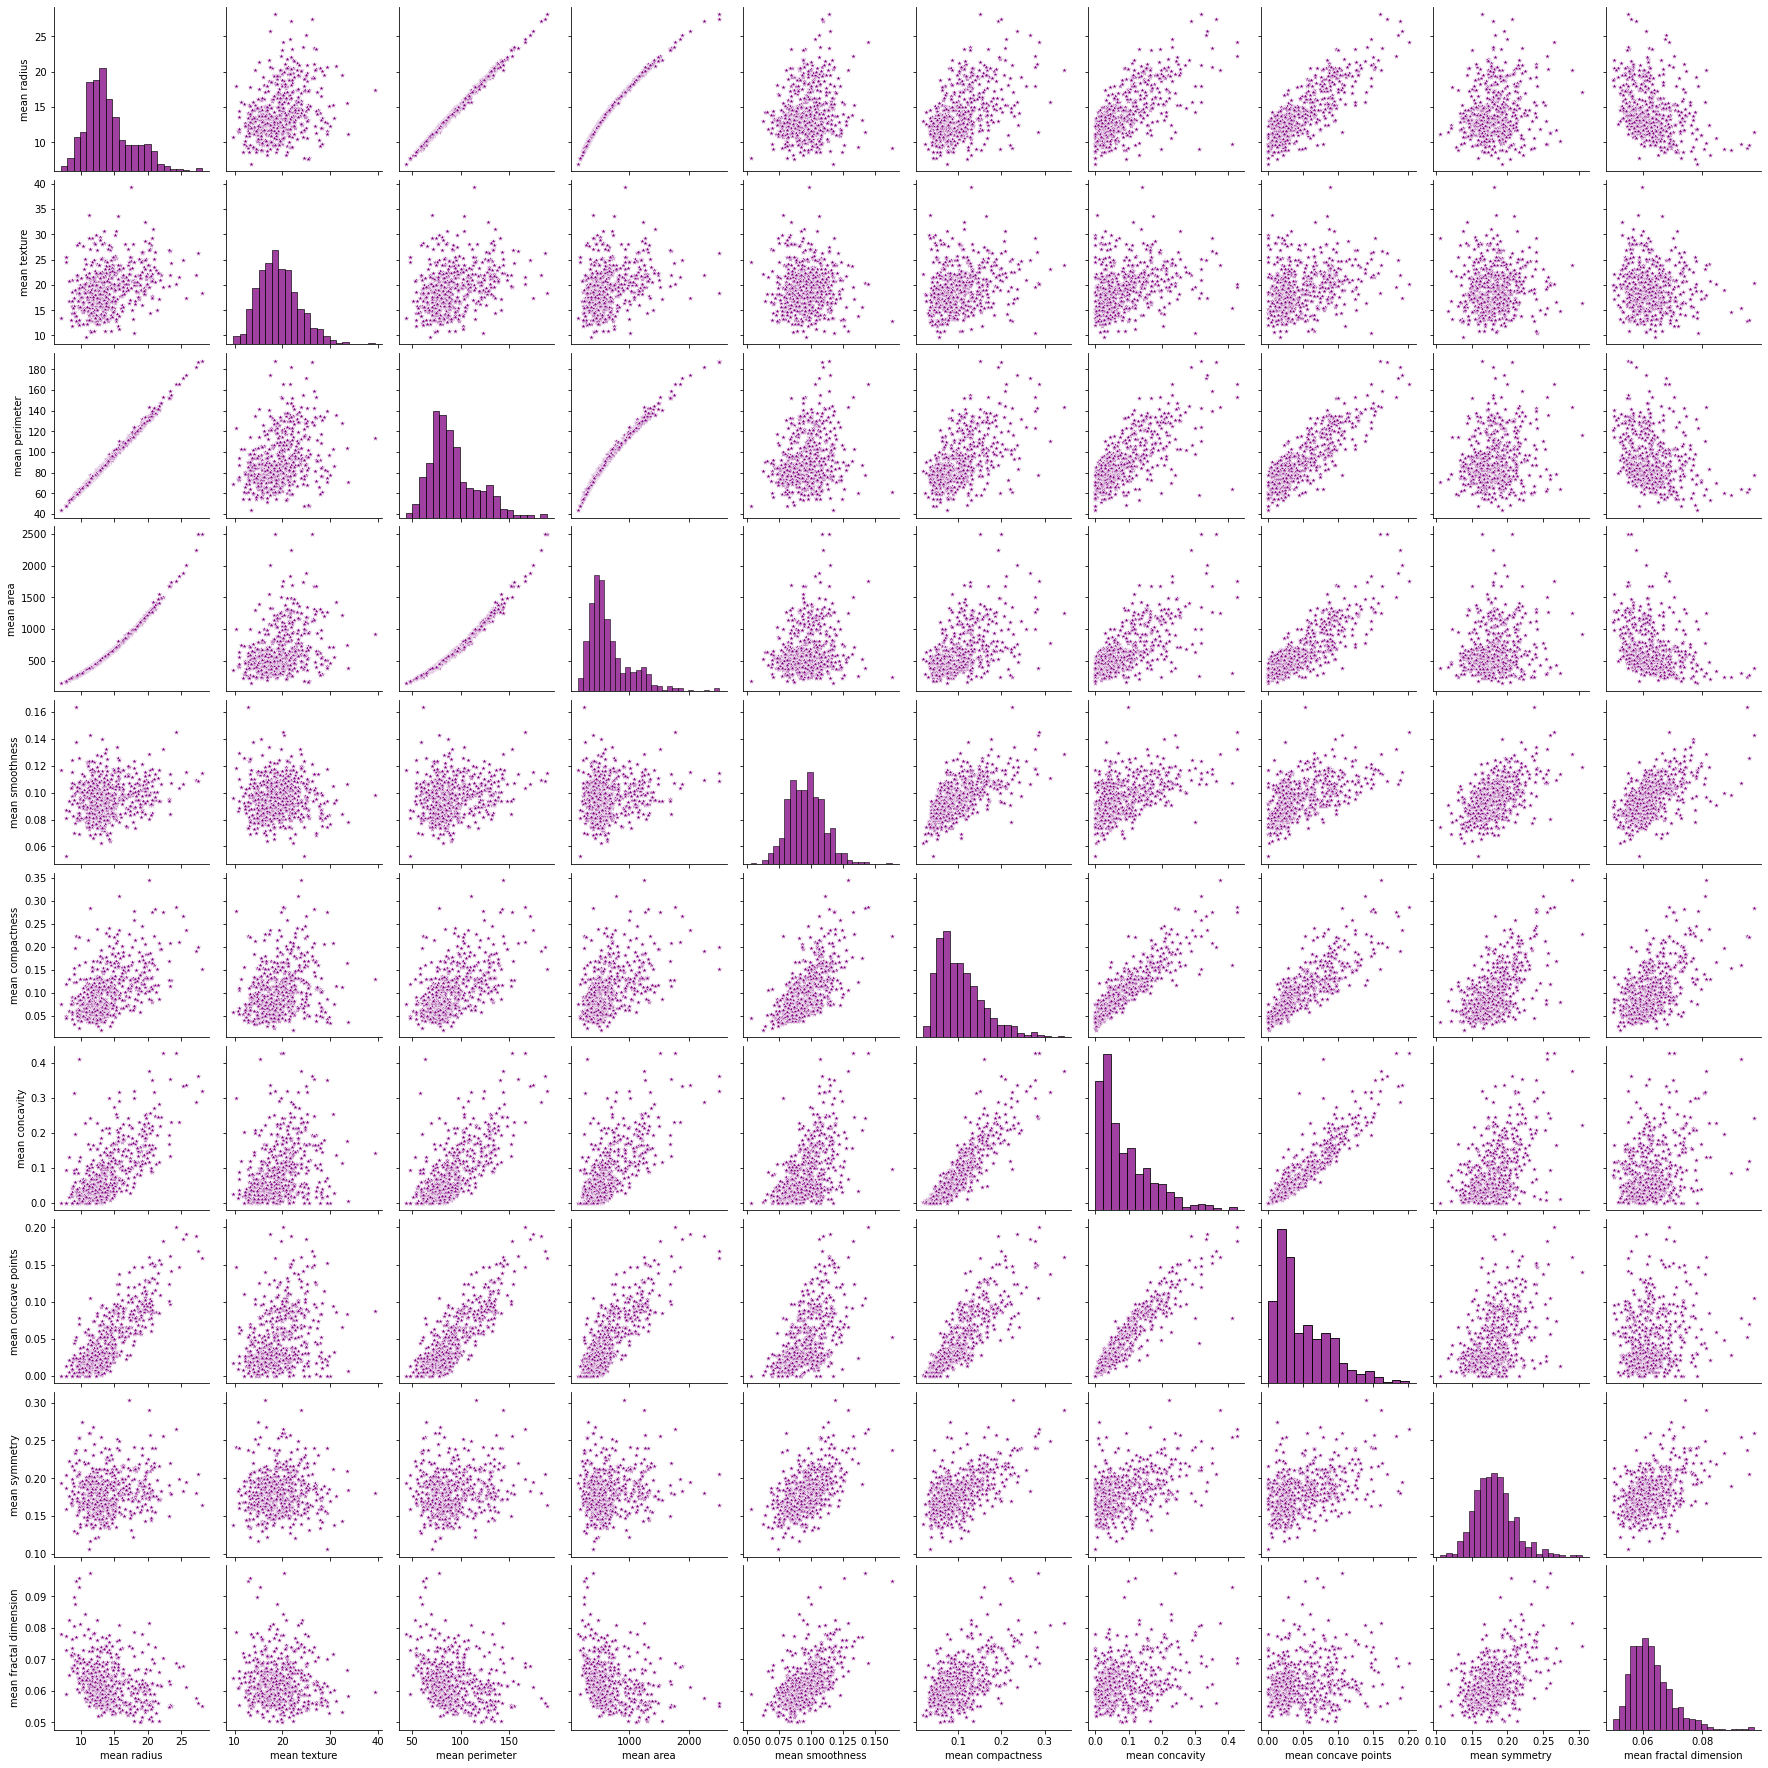

In [39]:
sns.pairplot(features,plot_kws={'color':'purple','marker':'*'}
            ,diag_kws={'color':'purple'})

In [7]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


<AxesSubplot:>

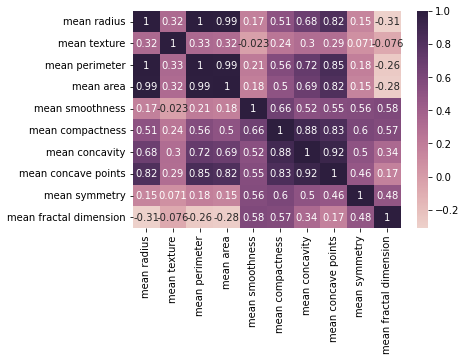

In [79]:
cor = features.corr()
sns.heatmap(cor, annot = True,cmap=sns.cubehelix_palette(as_cmap=True))

## Cross validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=1)

## Suport vector machine

In [35]:
#Suport vector machine (SVM)
SVM = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
SVM.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [37]:
scores = cross_val_score(SVM, features, target, cv=10)#Cross validation with k=10
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.92982456 0.80701754 0.9122807  0.87719298 0.92982456 0.94736842
 0.9122807  0.92982456 0.94736842 0.91071429]
0.91 accuracy with a standard deviation of 0.04


In [67]:
#Cross validation
y_prediction = cross_val_predict(SVM, X_train, y_train, cv=10)
print('Predicted values:',y_prediction)

#Metrics
#Confusion matrix
CM=confusion_matrix(y_train, y_prediction)
#true negative
TN=CM[0,0]
#false negative
FN=CM[1,0]
#true positive
TP=CM[1,1]
#false positive
FP=CM[0,1]
#Accuracy 
accuracy=accuracy_score(y_train, y_prediction)
#Sensitivity
SEN=TP/(TP+FN)
#Specificity
SPE=TN/TN+FP

print('Confusion matrix:',CM)
print('True negative:',TN)
print('False negative:',FN)
print('True positive:',TP)
print('False positive:',FP)

print('Accuracy:',accuracy) 
print('Sensitivity:',SEN)
print('Specificity:',SPE)

Predicted values: [0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1]
Confusion matrix: [[40  5]
 [ 5 63]]
True negative: 40
False negative: 5
True positive: 63
False positive: 5
Accuracy: 0.911504424778761
Sensitivity: 0.9264705882352942
Specificity: 6.0


## Decision Trees

In [19]:
#Decicion trees
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
d_tree.predict(X_test,bool(y_test.bool))

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

[Text(0.5416666666666666, 0.9166666666666666, 'x[7] <= 0.056\ngini = 0.479\nsamples = 113\nvalue = [45, 68]'),
 Text(0.3333333333333333, 0.75, 'x[2] <= 92.02\ngini = 0.131\nsamples = 71\nvalue = [5, 66]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[7] <= 0.031\ngini = 0.06\nsamples = 65\nvalue = [2, 63]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.25, 0.4166666666666667, 'x[6] <= 0.028\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.16666666666666666, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.25, 'x[7] <= 0.031\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4166666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.5, 0.5833333333333334, 'x[1] <= 17.54\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.4166666666666667, 0.4166666666666667, 'gini = 0.0\nsample

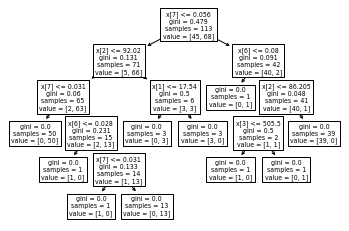

In [38]:
tree.plot_tree(d_tree)

In [45]:
scores2=cross_val_score(d_tree, features, target1, cv=10)
print(scores2)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

[0.87719298 0.85964912 0.94736842 0.9122807  0.9122807  0.92982456
 0.9122807  0.92982456 0.96491228 0.92857143]
0.92 accuracy with a standard deviation of 0.03


In [70]:
#Cross validation
y_prediction2 = cross_val_predict(d_tree, X_train, y_train, cv=10)
print('Predicted values:',y_prediction2)

#Metrics
#Confusion matrix
CM2=confusion_matrix(y_train, y_prediction2)
#true negative
TN2=CM2[0,0]
#false negative
FN2=CM2[1,0]
#true positive
TP2=CM2[1,1]
#false positive
FP2=CM2[0,1]
#Accuracy 
accuracy2=accuracy_score(y_train, y_prediction2)
#Sensitivity
SEN2=TP2/(TP2+FN2)
#Specificity
SPE2=TN2/TN2+FP2

print('Confusion matrix:',CM2)
print('True negative:',TN2)
print('False negative:',FN2)
print('True positive:',TP2)
print('False positive:',FP2)

print('Accuracy:',accuracy2) 
print('Sensitivity:',SEN2)
print('Specificity:',SPE2)

Predicted values: [0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1]
Confusion matrix: [[40  5]
 [ 7 61]]
True negative: 40
False negative: 7
True positive: 61
False positive: 5
Accuracy: 0.8938053097345132
Sensitivity: 0.8970588235294118
Specificity: 6.0


## Naive Bayes

In [44]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [47]:
score3=cross_val_score(gnb, features, target, cv=10)
print(score3)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score3.mean(), score3.std()))

[0.92982456 0.80701754 0.89473684 0.94736842 0.9122807  0.9122807
 0.92982456 0.98245614 0.85964912 0.98214286]
0.92 accuracy with a standard deviation of 0.05


In [71]:
#Cross validation
y_prediction3 = cross_val_predict(gnb, X_train, y_train, cv=10)
print('Predicted values:',y_prediction3)

#Metrics
#Confusion matrix
CM3=confusion_matrix(y_train, y_prediction3)
#true negative
TN3=CM3[0,0]
#false negative
FN3=CM3[1,0]
#true positive
TP3=CM3[1,1]
#false positive
FP3=CM3[0,1]
#Accuracy 
accuracy3=accuracy_score(y_train, y_prediction3)
#Sensitivity
SEN3=TP3/(TP3+FN3)
#Specificity
SPE3=TN3/TN3+FP3

print('Confusion matrix:',CM3)
print('True negative:',TN3)
print('False negative:',FN3)
print('True positive:',TP3)
print('False positive:',FP3)

print('Accuracy:',accuracy3) 
print('Sensitivity:',SEN3)
print('Specificity:',SPE3)

Predicted values: [0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1]
Confusion matrix: [[41  4]
 [ 2 66]]
True negative: 41
False negative: 2
True positive: 66
False positive: 4
Accuracy: 0.9469026548672567
Sensitivity: 0.9705882352941176
Specificity: 5.0


## K Neighbors Classifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
clf = knn.fit(X_train, y_train)
clf.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [76]:
score4=cross_val_score(knn, features, target, cv=10)
print(score4)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score4.mean(), score4.std()))

[0.84210526 0.84210526 0.8245614  0.85964912 0.87719298 0.89473684
 0.94736842 0.94736842 0.9122807  0.91071429]
0.89 accuracy with a standard deviation of 0.04


In [78]:
#Cross validation
y_prediction4 = cross_val_predict(knn, X_train, y_train, cv=10)
print('Predicted values:',y_prediction4)

#Metrics
#Confusion matrix
CM4=confusion_matrix(y_train, y_prediction4)
#true negative
TN4=CM4[0,0]
#false negative
FN4=CM4[1,0]
#true positive
TP4=CM4[1,1]
#false positive
FP4=CM4[0,1]
#Accuracy 
accuracy4=accuracy_score(y_train, y_prediction4)
#Sensitivity
SEN4=TP4/(TP4+FN4)
#Specificity
SPE4=TN4/TN4+FP4

print('Confusion matrix:',CM4)
print('True negative:',TN4)
print('False negative:',FN4)
print('True positive:',TP4)
print('False positive:',FP4)

print('Accuracy:',accuracy4) 
print('Sensitivity:',SEN4)
print('Specificity:',SPE4)

Predicted values: [0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1]
Confusion matrix: [[36  9]
 [ 4 64]]
True negative: 36
False negative: 4
True positive: 64
False positive: 9
Accuracy: 0.8849557522123894
Sensitivity: 0.9411764705882353
Specificity: 10.0


| Model | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Suport vector machine | 0.91 |  0.92 | 6 |
| Decision Trees | 0.89 | 0.89 | 6 |
| Naive Bayes | 0.94 |  0.97 | 5 |
| K Neighbors Classifier | 0.88 |  0.94 | 10 |

## PCA

In [82]:
#Standardize the feautures
scalar = StandardScaler() 
scaled_data=pd.DataFrame(scalar.fit_transform(features))
scaled_data

,0,1,2,3,4,5,6,7,8,9
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


<AxesSubplot:>

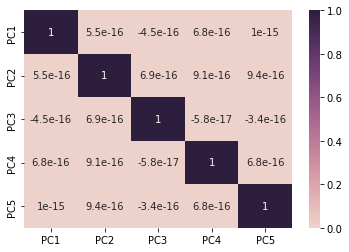

In [98]:
pca=PCA(n_components=5)
pca.fit(scaled_data) #finds a line that best fits a collection of dataset
data_pca=pca.transform(scaled_data) #Applying PCA transform
data_pca=pd.DataFrame(data_pca,
                     columns=['PC1','PC2','PC3','PC4','PC5']) #Transform PCA in a dataframe
sns.heatmap(data_pca.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

In [99]:
data_pca

,PC1,PC2,PC3,PC4,PC5
0,5.224155,3.204428,-2.171340,-0.169276,1.514252
1,1.728094,-2.540839,-1.019679,0.547539,0.312330
2,3.969757,-0.550075,-0.323569,0.397964,-0.322877
3,3.596713,6.905070,0.792832,-0.604828,0.243176
4,3.151092,-1.358072,-1.862234,-0.185251,0.311342
...,...,...,...,...,...
564,4.436781,-2.020670,-0.457737,-0.472738,-0.802882
565,2.874757,-2.395235,1.169465,0.073879,-0.745189
566,0.649583,-2.041783,1.710966,-0.271559,-0.101971
567,6.905664,1.216243,1.640120,0.153472,0.405966


In [100]:
#Cross validation
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_pca, target, test_size=0.8, random_state=1)
y_prediction5 = cross_val_predict(gnb, X_train2, y_train2, cv=10)
print('Predicted values:',y_prediction3)

#Metrics
#Confusion matrix
CM5=confusion_matrix(y_train2, y_prediction5)
#true negative
TN5=CM5[0,0]
#false negative
FN5=CM5[1,0]
#true positive
TP5=CM5[1,1]
#false positive
FP5=CM5[0,1]
#Accuracy 
accuracy5=accuracy_score(y_train, y_prediction5)
#Sensitivity
SEN5=TP5/(TP5+FN5)
#Specificity
SPE5=TN5/TN5+FP5

print('Confusion matrix:',CM5)
print('True negative:',TN5)
print('False negative:',FN5)
print('True positive:',TP5)
print('False positive:',FP5)

print('Accuracy:',accuracy5) 
print('Sensitivity:',SEN5)
print('Specificity:',SPE5)

Predicted values: [0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1]
Confusion matrix: [[41  4]
 [ 3 65]]
True negative: 41
False negative: 3
True positive: 65
False positive: 4
Accuracy: 0.9380530973451328
Sensitivity: 0.9558823529411765
Specificity: 5.0


| Model | Accuracy | Sensitivity | Specificity |
| --- | --- | --- | --- |
| Suport vector machine | 0.91 |  0.92 | 6 |
| Decision Trees | 0.89 | 0.89 | 6 |
| Naive Bayes | 0.94 |  0.97 | 5 |
| K Neighbors Classifier | 0.88 |  0.94 | 10 |
| Naive Bayes (PCA) | 0.94 |  0.95 | 5 |

## Conclusion
The Naive Bayes model was determined to be the most effective for predicting values, and PCA did not result in any significant changes in accuracy.